## Library Import

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 10)
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn import metrics

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

## Data Load

In [2]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")
sub = pd.read_csv("./input/gender_submission.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Carter, Mr. William Ernest",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Miles, Mr. Frank",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [6]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
sub.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


## EDA(탐색적 자료 분석)를 하자.

#### Correlations

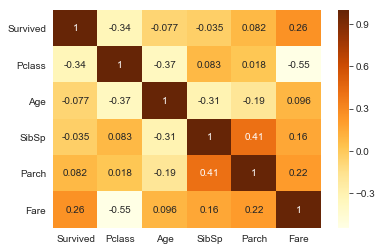

In [8]:
corr = train.drop('PassengerId',axis=1).corr()
sns.heatmap(corr, annot=True, cmap='YlOrBr')

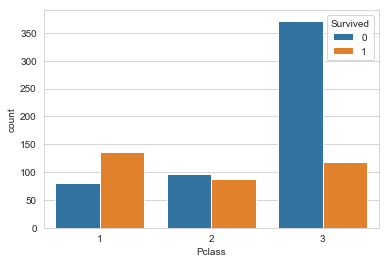

In [9]:
sns.countplot(train['Pclass'], hue=train['Survived'])

Text(0.5, 0, 'Fare')

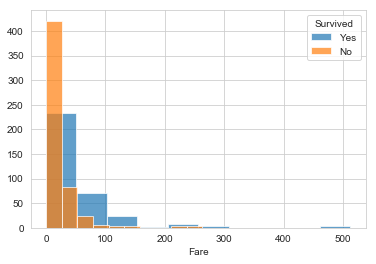

In [10]:
plt.hist(train[train["Survived"]==1]['Fare'], label="Yes", alpha=0.7)
plt.hist(train[train["Survived"]==0]['Fare'], label="No", alpha=0.7)
plt.legend(title='Survived')
plt.xlabel("Fare")

#### train, test data 합치기

In [11]:
Survival = train.Survived # Label for training set
full = pd.concat([train.drop('Survived', axis=1), test])
full.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


## Feature Engineering

In [12]:
full1 = full.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)
full1.describe(include="all")

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1308.000000,1307
unique,NaN,1307,2,NaN,NaN,NaN,NaN,3
top,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,NaN,S
freq,NaN,2,843,NaN,NaN,NaN,NaN,914
mean,2.294882,NaN,NaN,29.881138,0.498854,0.385027,33.295479,NaN
std,0.837836,NaN,NaN,14.413493,1.041658,0.865560,51.758668,NaN
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,0.000000,NaN
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,31.275000,NaN


In [13]:
pclass = pd.get_dummies(full1['Pclass'], prefix="Pclass_")
pclass.head()

,Pclass__1,Pclass__2,Pclass__3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [14]:
full1['Sex_'] = np.where(full1.Sex == 'male', 1, 0)
full1.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [15]:
Embarked = pd.get_dummies(full1['Embarked'], prefix="Embarked_")
Embarked.head()

,Embarked__C,Embarked__Q,Embarked__S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [16]:
full2 = pd.concat([full1, pclass, Embarked], axis=1)
full2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,0,1,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,1,0,0,1,0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,0,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,1,0,0,0,0,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0,0,1,0,0,1


In [17]:
full3 = full2.drop(["Pclass", "Sex", "Embarked"], axis=1)
full3.describe(include="all")

,Name,Age,SibSp,Parch,Fare,Sex_,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S
count,1309,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
unique,1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"Connolly, Miss. Kate",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,29.881138,0.498854,0.385027,33.295479,0.644003,0.246753,0.211612,0.541635,0.206264,0.093965,0.698243
std,NaN,14.413493,1.041658,0.865560,51.758668,0.478997,0.431287,0.408607,0.498454,0.404777,0.291891,0.459196
min,NaN,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,NaN,39.000000,1.000000,0.000000,31.275000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000


In [18]:
Title = pd.get_dummies(full.Name.map(lambda x: x.split(',')[1].split('.')[0].split()[-1]))
Title.head()

,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
full3['FamilySize'] = full3.SibSp + full3.Parch + 1
full3['Single'] = np.where((full3.SibSp + full3.Parch) == 0, 1, 0)
full4 = pd.concat([full3, Title], axis=1)
full4.drop('Name', axis=1, inplace=True)
full4.head()

,Age,SibSp,Parch,Fare,Sex_,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,...,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
0,22.0,1,0,7.2500,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,38.0,1,0,71.2833,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,35.0,1,0,53.1000,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,35.0,0,0,8.0500,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Correlations new feature

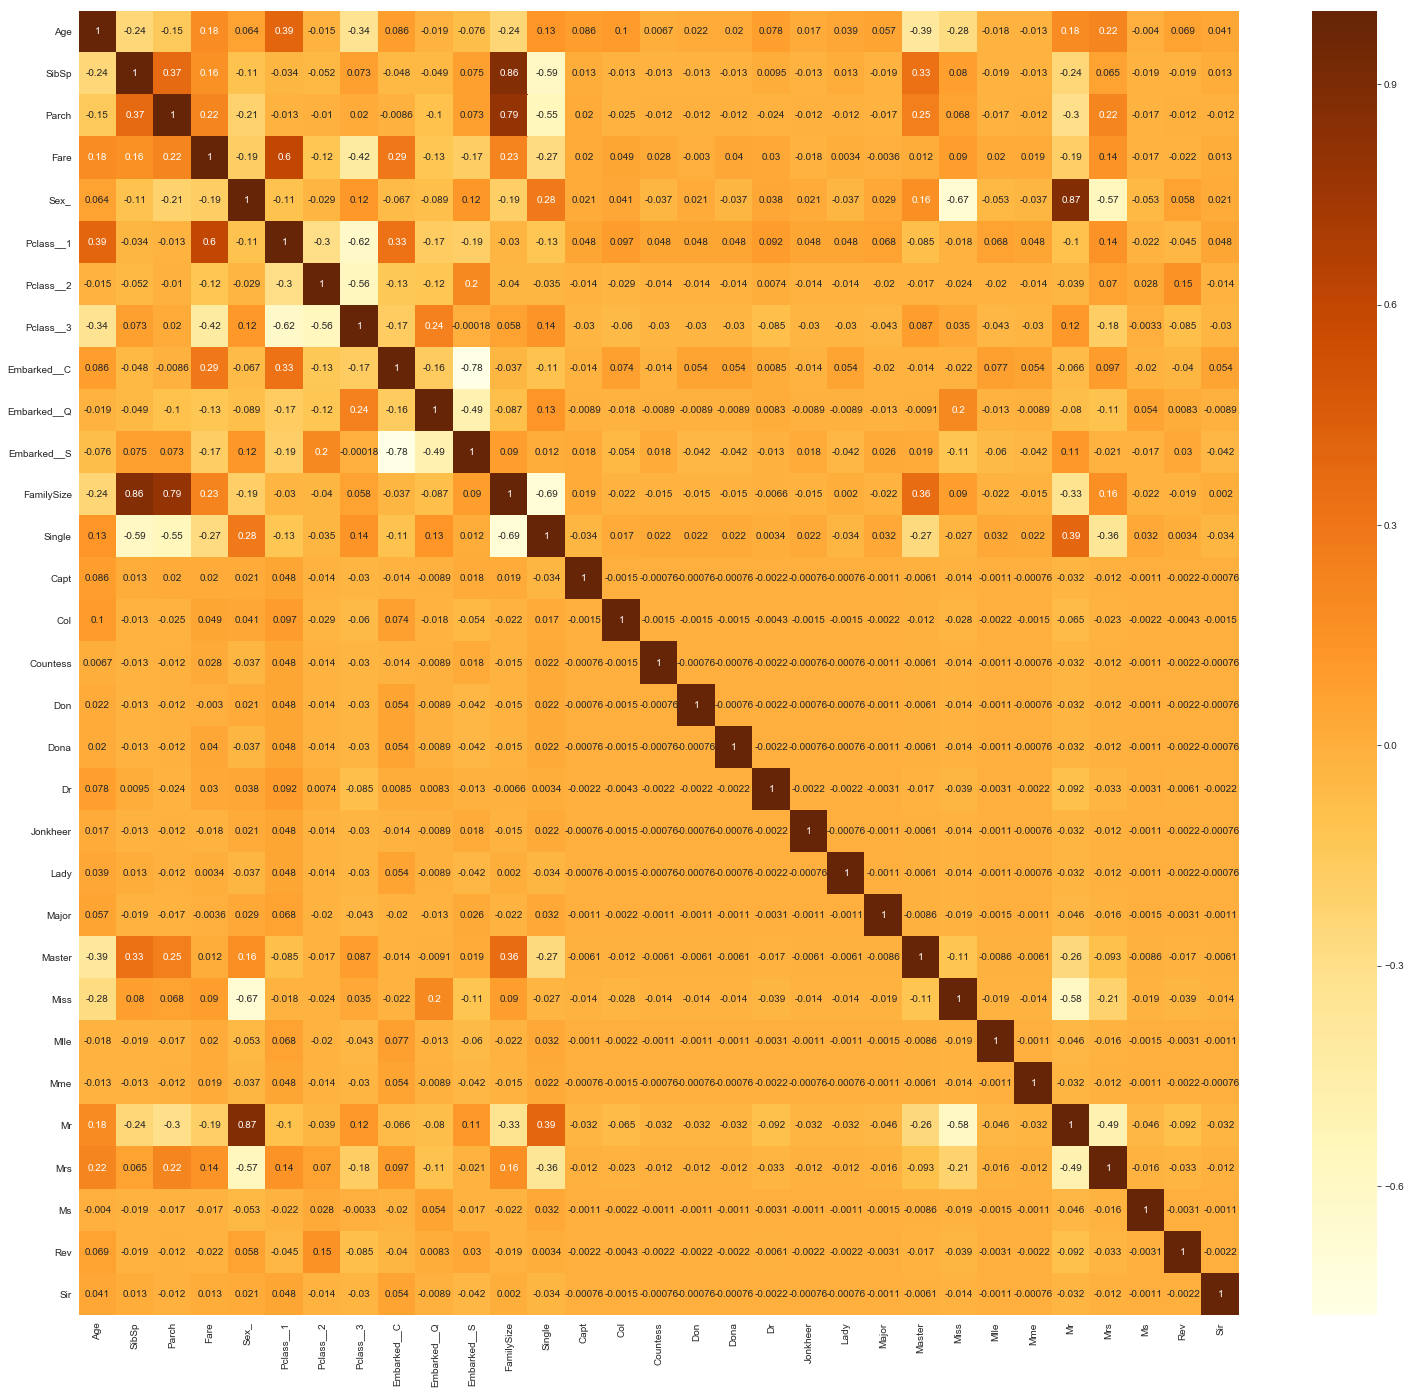

In [20]:
plt.figure(figsize=(26, 24))
sns.heatmap(full4.corr(), annot=True, cmap="YlOrBr")

In [21]:
full5 = full4.loc[:,'Age':'Single'] # or: full4.iloc[:,0:13]
full5.head()

,Age,SibSp,Parch,Fare,Sex_,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,FamilySize,Single
0,22.0,1,0,7.2500,1,0,0,1,0,0,1,2,0
1,38.0,1,0,71.2833,0,1,0,0,1,0,0,2,0
2,26.0,0,0,7.9250,0,0,0,1,0,0,1,1,1
3,35.0,1,0,53.1000,0,1,0,0,0,0,1,2,0
4,35.0,0,0,8.0500,1,0,0,1,0,0,1,1,1


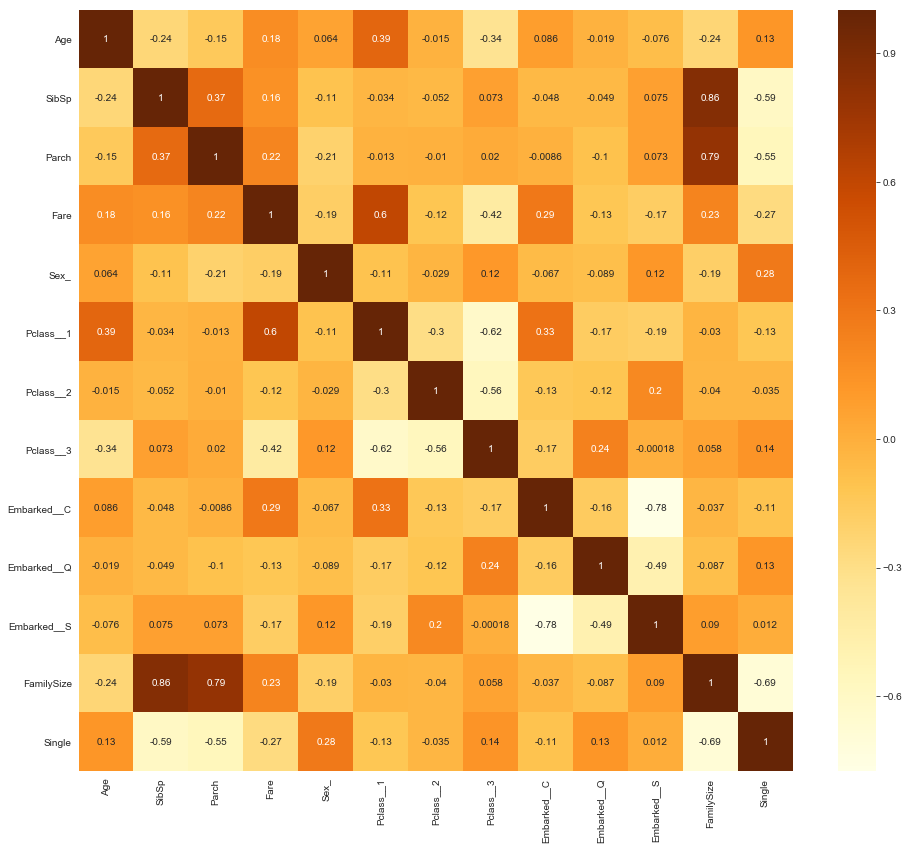

In [22]:
plt.figure(figsize=(16, 14))
sns.heatmap(full5.corr(), annot=True, cmap="YlOrBr")

In [23]:
full6 = full5.drop(['SibSp','Parch', 'Single'], axis=1)
full6.head()

,Age,Fare,Sex_,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,FamilySize
0,22.0,7.2500,1,0,0,1,0,0,1,2
1,38.0,71.2833,0,1,0,0,1,0,0,2
2,26.0,7.9250,0,0,0,1,0,0,1,1
3,35.0,53.1000,0,1,0,0,0,0,1,2
4,35.0,8.0500,1,0,0,1,0,0,1,1


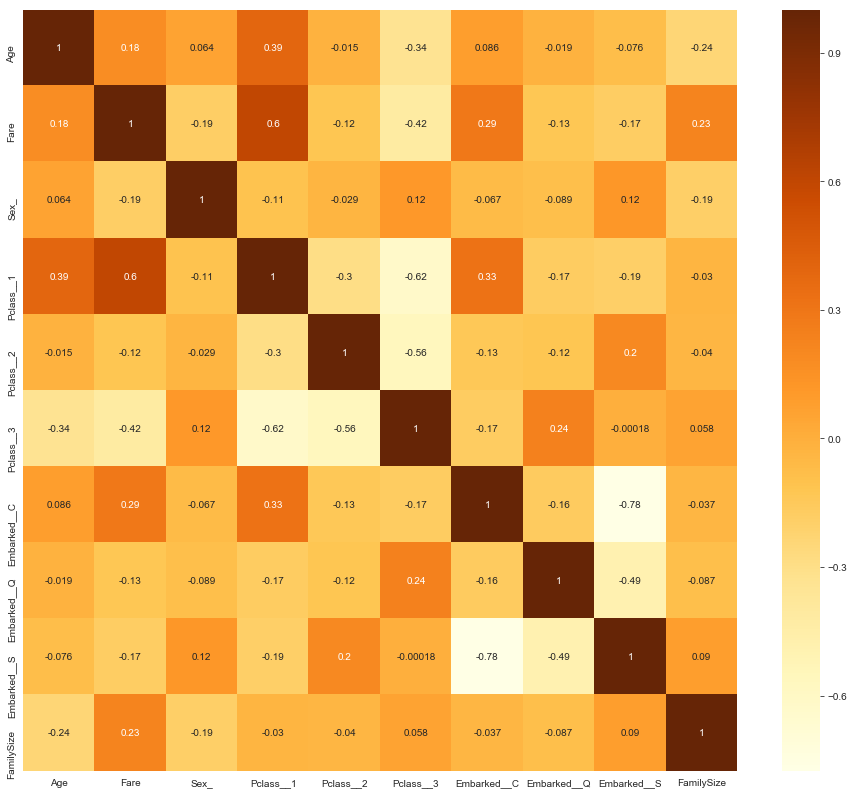

In [24]:
plt.figure(figsize=(16, 14))
sns.heatmap(full6.corr(), annot=True, cmap="YlOrBr")

#### train, test data로 다시 분리

In [25]:
train_full = full6.iloc[:891]
test_full = full6.iloc[891:]
train_full.describe(include="all")

,Age,Fare,Sex_,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,FamilySize
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.647587,0.242424,0.206510,0.551066,0.188552,0.086420,0.722783,1.904602
std,14.526497,49.693429,0.477990,0.428790,0.405028,0.497665,0.391372,0.281141,0.447876,1.613459
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.125000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,28.000000,14.454200,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,38.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


In [26]:
test_full.describe(include="all")

,Age,Fare,Sex_,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,FamilySize
count,332.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,30.272590,35.627188,0.636364,0.255981,0.222488,0.521531,0.244019,0.110048,0.645933,1.839713
std,14.181209,55.907576,0.481622,0.436934,0.416416,0.500135,0.430019,0.313324,0.478803,1.519072
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,14.454200,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,39.000000,31.500000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000
max,76.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


## Impute the missing Values

In [27]:
train_age_imputer = SimpleImputer()
train_imputed = train_full.copy()
train_imputed['Age_'] = train_age_imputer.fit_transform(train_full.iloc[:,0:1])
train_imputed['Fare_'] = train_imputed['Fare']
train_imputed.drop(['Age', 'Fare'], axis=1, inplace=True)
train_imputed.head()

,Sex_,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,FamilySize,Age_,Fare_
0,1,0,0,1,0,0,1,2,22.0,7.2500
1,0,1,0,0,1,0,0,2,38.0,71.2833
2,0,0,0,1,0,0,1,1,26.0,7.9250
3,0,1,0,0,0,0,1,2,35.0,53.1000
4,1,0,0,1,0,0,1,1,35.0,8.0500


In [28]:
test_age_imputer = SimpleImputer()
test_fare_imputer = SimpleImputer()

test_imputed = test_full.copy()
test_imputed['Age_'] = test_age_imputer.fit_transform(test_full.iloc[:,0:1])
test_imputed['Fare_'] = test_age_imputer.fit_transform(test_full.iloc[:,1:2])

test_imputed.drop(["Age","Fare"], axis=1, inplace=True)
test_imputed.head()

,Sex_,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,FamilySize,Age_,Fare_
0,1,0,0,1,0,1,0,1,34.5,7.8292
1,0,0,0,1,0,0,1,2,47.0,7.0000
2,1,0,1,0,0,1,0,1,62.0,9.6875
3,1,0,0,1,0,0,1,1,27.0,8.6625
4,0,0,0,1,0,0,1,3,22.0,12.2875


In [29]:
train_imputed.describe(include="all")

,Sex_,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,FamilySize,Age_,Fare_
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,0.242424,0.206510,0.551066,0.188552,0.086420,0.722783,1.904602,29.699118,32.204208
std,0.477990,0.428790,0.405028,0.497665,0.391372,0.281141,0.447876,1.613459,13.002015,49.693429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000,7.910400
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.699118,14.454200
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,35.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,80.000000,512.329200


In [30]:
test_imputed.describe(include="all")

,Sex_,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,FamilySize,Age_,Fare_
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.636364,0.255981,0.222488,0.521531,0.244019,0.110048,0.645933,1.839713,30.272590,35.627188
std,0.481622,0.436934,0.416416,0.500135,0.430019,0.313324,0.478803,1.519072,12.634534,55.840500
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.170000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23.000000,7.895800
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.272590,14.454200
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,35.750000,31.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,76.000000,512.329200


#### EDA (새로운 feature 추가)

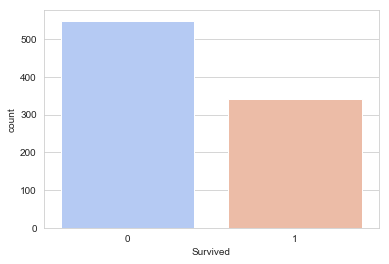

In [31]:
sns.countplot(Survival, palette="coolwarm")

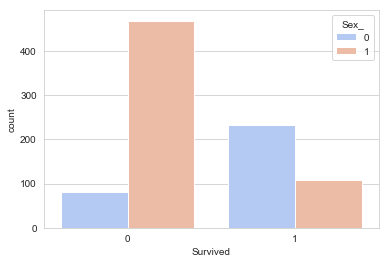

In [32]:
# Survival by Sex
sns.countplot(Survival, hue=train_imputed["Sex_"], palette="coolwarm")

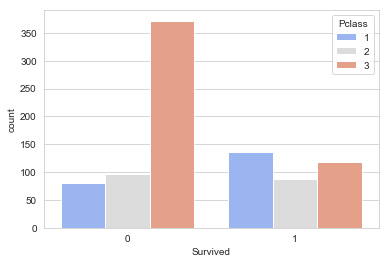

In [33]:
# Survival by PClass
sns.countplot(Survival, hue=train["Pclass"], palette="coolwarm")

Text(0.5, 0, 'Age_Imputed')

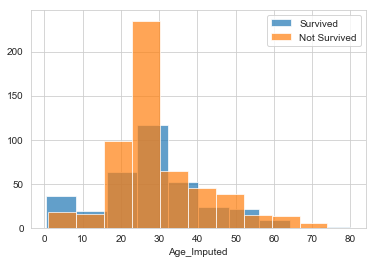

In [34]:
# Survival by Age
plt.hist(train_imputed[Survival==1]['Age_'], label="Survived", alpha=0.7)
plt.hist(train_imputed[Survival==0]['Age_'], label="Not Survived", alpha=0.7)
plt.legend()
plt.xlabel("Age_Imputed")

Text(0.5, 1.0, 'Imputed Fare')

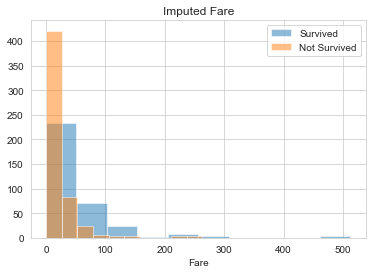

In [35]:
# Survival by Fare
plt.hist(train_imputed[Survival==1]['Fare_'], label="Survived", alpha=0.5)
plt.hist(train_imputed[Survival==0]['Fare_'], label="Not Survived", alpha=0.5)
plt.legend()
plt.xlabel("Fare")
plt.title("Imputed Fare")

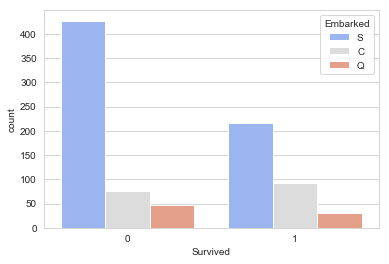

In [36]:
# Survival by Embarked
sns.countplot(Survival, data=train, hue="Embarked", palette="coolwarm")

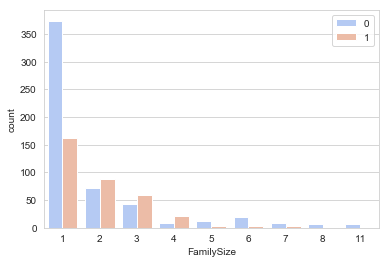

In [37]:
# Survival by Family size
sns.countplot('FamilySize', data=train_imputed, palette="coolwarm", hue=Survival)
plt.legend(loc=1)

## Modeling

In [38]:
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
kfold

KFold(n_splits=5, random_state=1, shuffle=True)

In [39]:
accuracy = {}

#### Gausian Naive Bayes

In [40]:
m1_nb = GaussianNB()
accuracy['Gaussian Naive Bayes'] = np.mean(cross_val_score(m1_nb, train_imputed, Survival, scoring="accuracy", cv=kfold))

#### Logistic Regression

In [41]:
m2_log = LogisticRegression(solver='newton-cg') # 'lbfgs', 'sag' failed to converge

accuracy['Logistic Regression'] = np.mean(cross_val_score(m2_log, train_imputed, Survival, scoring="accuracy", cv=kfold))

#### K-Nearest Neighbors

In [42]:
m3_knn_5 = KNeighborsClassifier(n_neighbors = 5)
m3_knn_10 = KNeighborsClassifier(n_neighbors = 10)
m3_knn_30 = KNeighborsClassifier(n_neighbors = 30)

accuracy['KNN'] = np.max([np.mean(cross_val_score(m3_knn_5, train_imputed, Survival, scoring="accuracy", cv=kfold)),
                          np.mean(cross_val_score(m3_knn_10, train_imputed, Survival, scoring="accuracy", cv=kfold)),
                          np.mean(cross_val_score(m3_knn_30, train_imputed, Survival, scoring="accuracy", cv=kfold))])

#### Random Forests

In [43]:
m4_rf = RandomForestClassifier(n_estimators=10)

accuracy['Random Forest'] = np.mean(cross_val_score(m4_rf, train_imputed, Survival, scoring="accuracy", cv=kfold))

#### Support Vector Machine

In [44]:
m5_svc = SVC(gamma='scale')

accuracy['SVM'] = np.mean(cross_val_score(m5_svc, train_imputed, Survival, scoring="accuracy", cv=kfold))

#### Gradient Boosting

In [45]:
m6_gb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

accuracy['Gradient Boosting'] = np.mean(cross_val_score(m6_gb, train_imputed, Survival, scoring="accuracy", cv=kfold))

## Check Each Model's Accuracy

In [46]:
accuracy

{'Gaussian Naive Bayes': 0.7721988575732848,
 'Logistic Regression': 0.8013621241604418,
 'KNN': 0.7137969995606052,
 'Random Forest': 0.8025171050153789,
 'SVM': 0.7171928943569142,
 'Gradient Boosting': 0.8215805661917017}

In [47]:
max_accuracy = max(accuracy, key=accuracy.get)
print(max_accuracy, '\taccuracy:', accuracy[max_accuracy])

Gradient Boosting 	accuracy: 0.8215805661917017


## What is Important Feature?

In [48]:
m4_rf.fit(train_imputed, Survival)
#rf_predictions = rf.predict(test_imputed)
m4_rf.feature_importances_

array([0.26415654, 0.0292908 , 0.02040399, 0.06082568, 0.01797427,
       0.00802231, 0.01006217, 0.07592221, 0.25590909, 0.25743294])

In [49]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
Sex_           891 non-null int32
Pclass__1      891 non-null uint8
Pclass__2      891 non-null uint8
Pclass__3      891 non-null uint8
Embarked__C    891 non-null uint8
Embarked__Q    891 non-null uint8
Embarked__S    891 non-null uint8
FamilySize     891 non-null int64
Age_           891 non-null float64
Fare_          891 non-null float64
dtypes: float64(2), int32(1), int64(1), uint8(6)
memory usage: 76.5 KB


In [50]:
m6_gb.fit(train_imputed, Survival)
m6_gb.feature_importances_

array([0.44705808, 0.08094016, 0.02850133, 0.25005764, 0.01904796,
       0.        , 0.05898616, 0.05242239, 0.03244368, 0.03054265],
      dtype=float32)

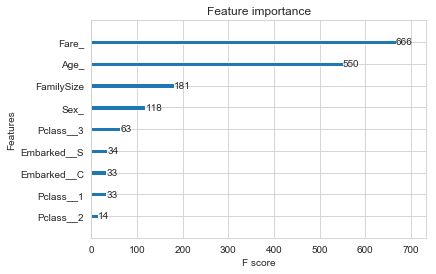

In [51]:
plot_importance(m6_gb)

## Grid Search for Hyper parameters

In [54]:
param_grid = {'max_depth': [1, 3, 5, 10, 15], 'n_estimators': [50, 100, 200, 500, 1000], 'learning_rate':[1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(XGBClassifier(), param_grid, cv=kfold)
grid.fit(train_imputed[['Fare_', 'Age_', 'FamilySize', 'Sex_']], Survival)
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}

In [55]:
gb = XGBClassifier(max_depth=3, n_estimators=1000, learning_rate=0.01)
np.mean(cross_val_score(gb, train_imputed[['Fare_', 'Age_', 'FamilySize', 'Sex_']], Survival, scoring='accuracy', cv=kfold))

0.8282970309459545

In [56]:
gb.fit(train_imputed[['Fare_', 'Age_', 'FamilySize', 'Sex_']], Survival)
predictions = gb.predict(test_imputed[['Fare_', 'Age_', 'FamilySize', 'Sex_']])

In [57]:
result = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})

In [58]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
